In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df_pyber = pd.merge(df_ride, df_city , on='city', how='inner')

# Display the data table for preview
df_pyber.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

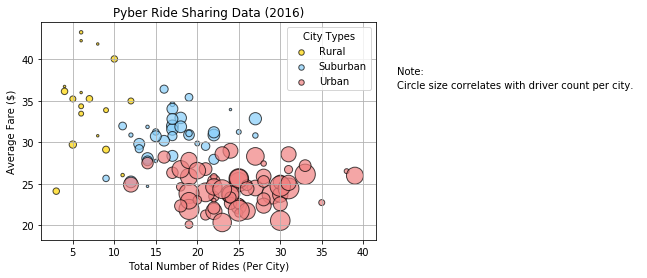

In [2]:
# Obtain the x and y coordinates for each of the three city types

df_city = df_pyber.groupby('city').agg({'ride_id':'count', 'fare':'mean', 'driver_count':'first','type':'first'})
df_city = df_city.rename(columns = {'ride_id':'total_rides','fare':'average_fare'})

x_rural = []
y_rural = []
z_rural = []

x_suburban = []
y_suburban = []
z_suburban = []

x_urban = []
y_urban = []
z_urban = []

for row in df_city.itertuples():
    if row.type == 'Rural':
        x_rural.append(row.total_rides)
        y_rural.append(row.average_fare)
        z_rural.append(row.driver_count)
        
    elif row.type == 'Suburban':
        x_suburban.append(row.total_rides)
        y_suburban.append(row.average_fare)
        z_suburban.append(row.driver_count)
        
    
    elif row.type == 'Urban':
        x_urban.append(row.total_rides)
        y_urban.append(row.average_fare)
        z_urban.append(row.driver_count)
        
# Build the scatter plots for each city types
plt.scatter(x_rural,y_rural,facecolors="gold", edgecolors= "black", s=np.multiply(6,z_rural), alpha=0.7, label = 'Rural')
plt.scatter(x_suburban,y_suburban,facecolors="lightskyblue", edgecolors= "black", s=np.multiply(6,z_suburban), alpha=0.7, 
            label = 'Suburban')
plt.scatter(x_urban,y_urban,facecolors="lightcoral", edgecolors= "black", s=np.multiply(6,z_urban), alpha=0.7, label = "Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd=plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
text=plt.text(0.95, 0.7, 'Note:', transform=plt.gcf().transFigure)
text=plt.text(0.95, 0.65, 'Circle size correlates with driver count per city.  ', transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("PyberRide.png")

## Total Fares by City Type

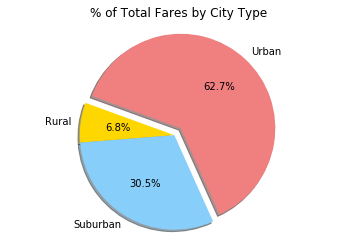

In [3]:
# Calculate Type Percents

df_pyber_type = df_pyber.groupby('type', as_index=False).sum()
df_pyber_type = df_pyber_type.drop(['ride_id', 'driver_count'], axis=1)
total_fares = df_pyber_type['fare'].sum()
df_pyber_type['total_fares']= total_fares
df_pyber_type['percent']= np.divide(df_pyber_type['fare'],df_pyber_type['total_fares'])*100

# Build Pie Chart

labels = df_pyber_type['type']
sizes = df_pyber_type['percent']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
ax1.axis('equal') 
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FaresPie.png")

## Total Rides by City Type

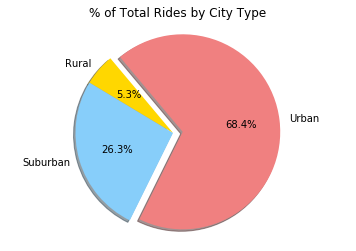

In [4]:
# Calculate Ride Percents

df_pyber_ride = df_pyber.groupby('type', as_index=False).count()
df_pyber_ride = df_pyber_ride.drop(['city','date','fare','driver_count'], axis=1)
total_rides = df_pyber_ride['ride_id'].sum()
df_pyber_ride['total_rides']= total_rides
df_pyber_ride['percent']= np.divide(df_pyber_ride['ride_id'],df_pyber_ride['total_rides'])*100

# Build Pie Chart

labels = df_pyber_ride['type']
sizes = df_pyber_ride['percent']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=130)
ax1.axis('equal') 
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("RidesPie.png")

## Total Drivers by City Type

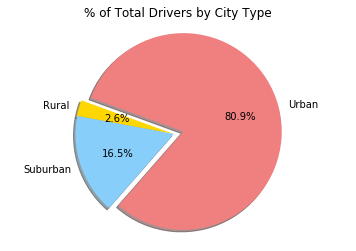

In [5]:
# Calculate Driver Percents

df_pyber_drivers = df_city.groupby('type', as_index=False).sum()
df_pyber_drivers = df_pyber_drivers.drop(['total_rides','average_fare'], axis=1)
total_drivers = df_pyber_drivers['driver_count'].sum()
df_pyber_drivers['total_drivers']= total_drivers
df_pyber_drivers['percent']= np.divide(df_pyber_drivers['driver_count'],df_pyber_drivers['total_drivers'])*100
df_pyber_drivers

# Build Pie Charts

labels = df_pyber_drivers['type']
sizes = df_pyber_drivers['percent']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
ax1.axis('equal') 
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversPie.png")

In [6]:
print("-----------------------------------------------------------------------------------------------------------------------")
print("Observable trends summary: ")
print()
print("1. As expected, the large majority of Pyber activities take place on urban settings.")
print("2. In general , we can observe than in places whith higher number of drivers and rides, fares tend to be lower.")
print("For instance, rural places have the lowest activity but the most expensive fares, as the fare is related to the")
print("service ability to meet the demand. Also, in rural areas, places are more difficult to reach and roads tend to be more")
print("challeging than in urban or suburban settings, which also adds to the cost.")
print("3. The numbers of drivers available is not always a clear indicator of the number of rides expected in the city. We can see")
print("cases in which cities with a large number of drivers reported only a few rides, while other cities with less drivers")
print("on the road reported to have a more significant number of rides in the same time slot.")
print("-----------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------------
Observable trends summary: 

1. As expected, the large majority of Pyber activities take place on urban settings.
2. In general , we can observe than in places whith higher number of drivers and rides, fares tend to be lower.
For instance, rural places have the lowest activity but the most expensive fares, as the fare is related to the
service ability to meet the demand. Also, in rural areas, places are more difficult to reach and roads tend to be more
challeging than in urban or suburban settings, which also adds to the cost.
3. The numbers of drivers available is not always a clear indicator of the number of rides expected in the city. We can see
cases in which cities with a large number of drivers reported only a few rides, while other cities with less drivers
on the road reported to have a more significant number of rides in the same time slot.
-------------------